In [1]:
%%capture
# DO NOT EDIT THIS NOTEBOOK
# It generates a report to verify your submission
import logging, sys, os
logging.disable(sys.maxsize)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import solution
import time
start_verify = time.time()
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,3)

In [2]:
%matplotlib inline
import os
import pickle
import pandas as pd
import numpy as np
import pydot
from tensorflow.keras.utils import plot_model
from IPython.display import Image
import inspect
from IPython.core import page
page.page = print

grades = []

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')
        
def printSource(obj):
    print(''.join(str(x) for x in inspect.getsourcelines(obj)[0]))
        
# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

def print_answer(ans):
    output = ""
    for line in ans.splitlines()[1:]:
        output += line.strip() + " "
    output += "(length: "+str(len(output))+")\n"
    print(output)
        
def run_evaluation(name, model_builder, data, base_dir, target_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, print_model=True, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        grades.append("0")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Model not trained? Skipping.", verbose)
    else: # Load from file
        model = solution.load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
    # Report
    lc = pd.DataFrame(learning_curves)
    print("Max val score: {:.2f}%".format(lc.iloc[:,3].max()*100))
    grades.append("{:.2f}".format(lc.iloc[:,3].max()*100))
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    plt.show()
    
    if print_model:
        print(model.summary())
    plot_model(model, to_file=os.path.join(target_dir,name+'.png'), show_shapes=True, show_layer_names=False)
        
import pprint
pp = pprint.PrettyPrinter(indent=4)

### Web Information Retrieval and Data Mining - Assignment 3

In [3]:
grades.append(solution.target_dir.split(os.sep)[-1])
grades.append(solution.your_name)
print("Student: {0} ({1})".format(solution.your_name,solution.student_id))

Student: Brouwers, Anne (0934189)


#### Answer 1.1, Baseline (4p)
- Dense network, at least 3 layers, shaped like a pyramid
    - Last layer: 10 nodes, sigmoid. 
    - Loss: categorical cross-entropy. Metric: accuracy
- No preprocessing, regularization. Get at least 70% accuracy.
- Explain design decisions. Discuss performance.
    - Does it overfit (large/growing gap between loss and val_loss)?

As this is a multi-class classification, a softmax output layer is used, along with with the categorical cross-entropy loss function. In order to keep training times short, the ReLu activation function is used for the hidden layers. The numbers of layers and nodes were tuned through trial and error. In order to descend the gradient more reliably, the batch size was increased to 64.  (length: 386)



Max val score: 74.73%


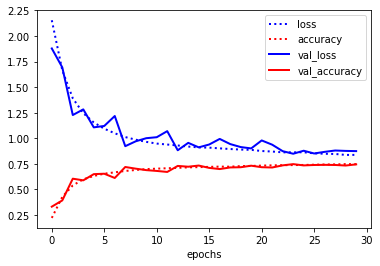

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_8 (Reshape)          (None, 3072)              0         
_________________________________________________________________
dense_66 (Dense)             (None, 400)               1229200   
_________________________________________________________________
dense_67 (Dense)             (None, 200)               80200     
_________________________________________________________________
dense_68 (Dense)             (None, 100)               20100     
_________________________________________________________________
dense_69 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_70 (Dense)             (None, 10)                510       
Total params: 1,335,060
Trainable params: 1,335,060
Non-trainable params: 0
___________________________________________

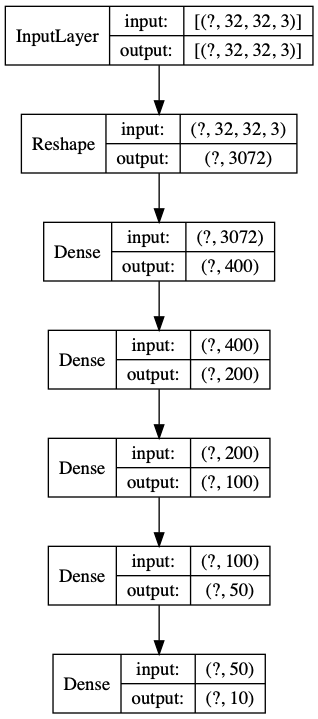

In [4]:
print_answer(solution.answer_q_1_1)
run_evaluation("model_1_1", solution.build_model_1_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_1
if os.path.exists(os.path.join(solution.target_dir,'model_1_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_1_1.png'), width=200))

#### Answer 1.2, Preprocess (2p)
- Convert images to greyscale, other preprocessing optional.
    - Input shape should be (32,32,1)
- Explain design decisions. Is it better? Why (not)? 
    - Color information is likely not so useful for classification. Greyscale makes the network smaller, less parameters to learn, less likely to overfit.

Aside from adjusting the reshaping layer for the new data shape, no changes were made to the model. This does result in a slightly higher accuracy, when compared to the non-preprocessed data.  (length: 193)



Max val score: 79.14%


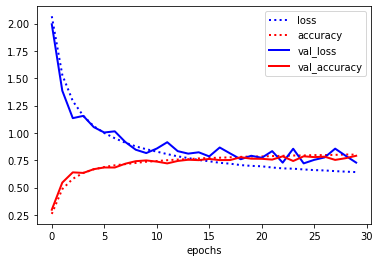

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 1024)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 400)               410000    
_________________________________________________________________
dense_53 (Dense)             (None, 100)               40100     
_________________________________________________________________
dense_54 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_55 (Dense)             (None, 10)                510       
Total params: 455,660
Trainable params: 455,660
Non-trainable params: 0
_________________________________________________________________
None


def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(400, activation='relu')) 
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(50, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [5]:
print_answer(solution.answer_q_1_2)
run_evaluation("model_1_2", solution.build_model_1_2, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_1_2

#### Answer 1.3, Tune (4p)
- Regularize the model. What works best? 
    - Should consider batch normalization, dropout, l1/l2 regularization (or Nesterov)
- Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
    - At least consider tuning learning rate, ideally also momentum, decay, other optimizers 
- Explain your findings and final design decisions. Discuss the results.
    - Should be better, at least it shouldn't overfit

When using regularization, we can use a model with a higher number of nodes. The model would usually overfit, however when using dropout regularization, this is mitigated and we get a better accuracy than before.  (length: 214)



Max val score: 80.03%


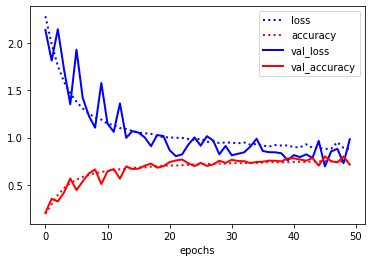

def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(1000, activation='relu')) 
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1000, activation='relu')) 
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1000, activation='relu')) 
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1000, activation='relu'))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(1000, activation='relu'))  
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [6]:
print_answer(solution.answer_q_1_3)
run_evaluation("model_1_3", solution.build_model_1_3, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
%psource solution.build_model_1_3

#### Answer 2.1, ConvNet (7p)
- Build a sequential ConvNet, get at least 90% accuracy.
    - Conv2D layers, input shape (32,32,1)
    - Consider using blocks of Conv2D layers with maxpooling in between
    - Use zero-padding in Conv2D layers because the images are small
    - At least one dense hidden layer and dense output layer (sigmoid)
    - Consider adding batch normalization, dropout
    - Consider small dropout rates in beginning, larger dropout rates later in network
    - Consider other optimizers and tuning learning rate, momentum,...
- Explain what you did and why (800 chars). Is it working well?
    - Should be quite elaborate and sensible

First, small features are extracted using the finer 3 by 3 convolutional layer. After this, in order to get more general features, two convolutional layers with a 5 by 5 kernel are used. In order to reduce overfitting, we then have a 2 by 2 pooling layer, follwed by the standard flatten, dense and output layers. Zero padding is used so that the output of a convolutional layer has the same size as its input. (length: 411)



Max val score: 91.92%


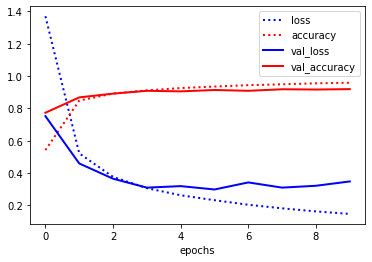

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 32, 32, 32)        320       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 32, 32, 32)        25632     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 16, 16, 32)        25632     
_________________________________________________________________
flatten_15 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 20)              

def build_model_2_1():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same'))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.Flatten())
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



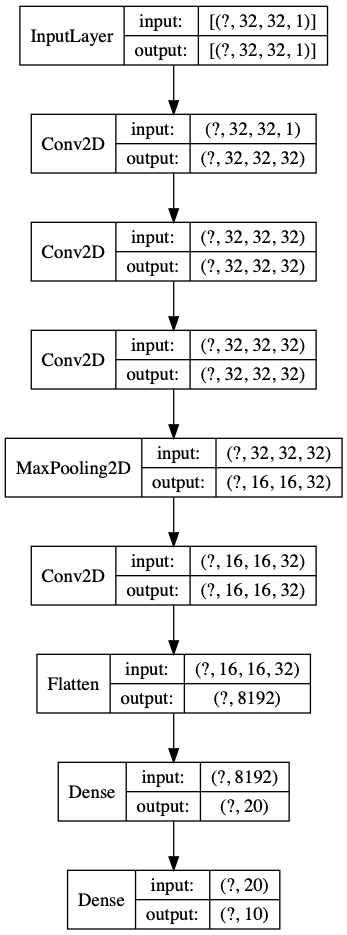

In [7]:
print_answer(solution.answer_q_2_1)
run_evaluation("model_2_1", solution.build_model_2_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_2_1
if os.path.exists(os.path.join(solution.target_dir,'model_2_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_2_1.png'), width=200))

#### Answer 2.2, Data Augmentation (3p)
- Augment the preprocessed training data.
    - Use small variations (small shifts up-down, left-right) of flips becasue the images are small
    - Large shifts and rotations distort the image too much
- Explain what you did and why. Discuss the performance of the model.

Since these are numbers, it does not make sense to flip them, or rotate them more than 45 degrees. This could even be very detrimental, causing numbers like 2 and 5 or 6 and 9 to be confused for each other. However, as the images are taken from various angles, shifts, shearing and zooming could be useful. After trying various combinations, only the shear transformation turned out to be useful. (length: 397)



Max val score: 91.52%


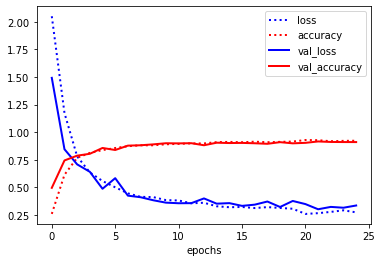


datagen = ImageDataGenerator(
      shear_range=5,
      horizontal_flip=False,
      fill_mode='nearest')


In [8]:
print_answer(solution.answer_q_2_2)
run_evaluation("model_2_2", solution.build_model_2_1, solution.augmented_split, solution.base_dir, 
               solution.target_dir, train=False, print_model=False)
print(solution.dg_code)

#### Answer 3.1, Misclassifications (2p)
- Report the test score (on the held-out test data)
    - Should be similar to score of previous model
- Plot confusion matrix, discuss which classes are often confused.
    - class 1 and 2 are most often confused
- Visualize the misclassifications in more depth by focusing on a single class
- Analyse which kinds of mistakes are made for that class.
    - Should contain some insight (e.g. misclassifications when the numbers are curly or noisy)

Since the number 3 seems to be misclassified a lot, some of these misclassifications were visualized. We see that in many cases, the misclassification can be attributed to an image that is very narrow (taken at an angle), blurry, contains extruded numbers casting shadows or includes multiple numbers. However, there is also definitely room for improvement, as some misclassifications occur when the picture would seem quite clear, but the font may be more complex. With a better performing model, these cases at least should not be an issue. (length: 543)

Test score: 0.91%


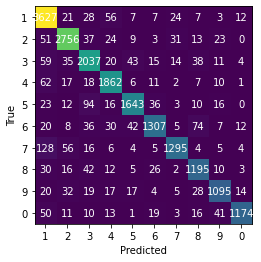

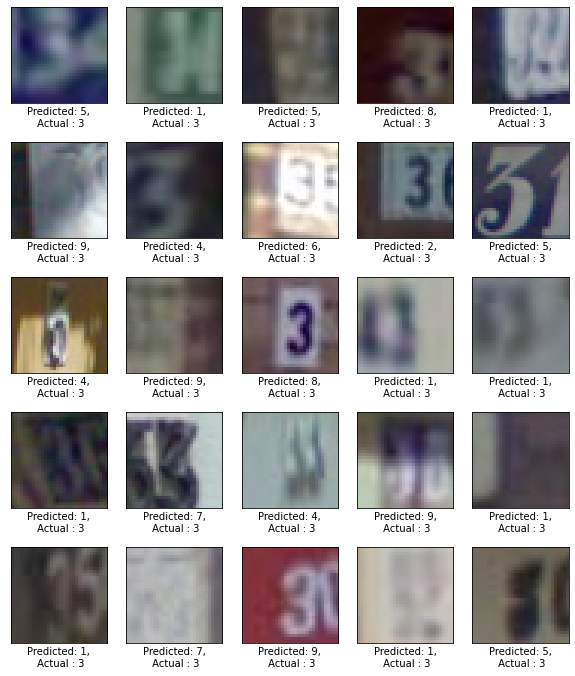

In [9]:
print_answer(solution.answer_q_3_1)
if hasattr(solution, 'test_accuracy_3_1'):
    try:
        print("Test score: {:.2f}%".format(solution.test_accuracy_3_1))
    except TypeError:
        print("Test score:",solution.test_accuracy_3_1)
else:
    print("Test score NOT FOUND: test_accuracy_3_1 missing")
try:
    solution.plot_confusion_matrix()
except:
    print("ERROR, could not build confusion matrix. Please check original report")
try:
    solution.plot_misclassifications()
except:
    print("ERROR, could not build misclassification plot. Please check original report")

#### Answer 3.2, Activations (4p)
- Retrieve and visualize the activations for one example
- For every filter for different convolutional layers (at different depths in the network).
- Give an explanation. Is your model indeed learning something useful?
    - Should detect edges etc in first layers, higher-order object (e.g. interesting regions) in deeper layers.

From the activations of the first convolutional layer, we can see the information that is extracted. Filter 3 extracts right edges, 4 the background, 9 and 26 left edges, etc. In the second layer, a more general division can be seen into edges, foreground and background. After pooling, the activations become more abstract. Depending on the specifics, like the colors and layout, for different images different filters may extract useful features. (length: 449)



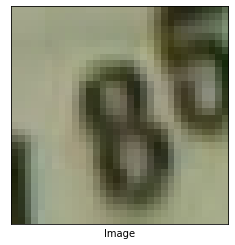

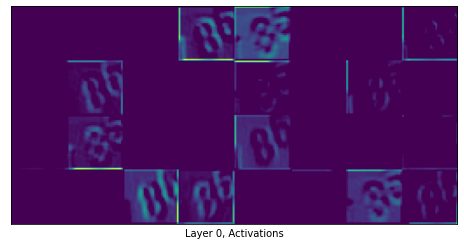

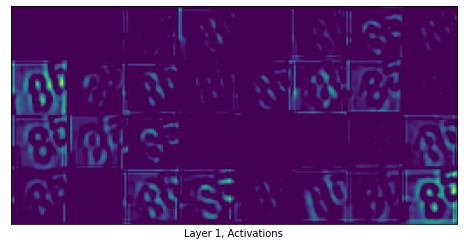

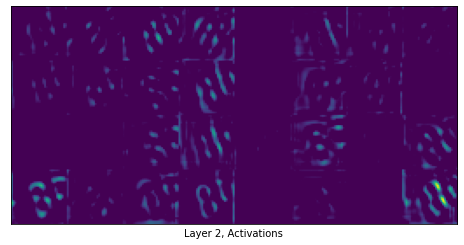

In [10]:
print_answer(solution.answer_q_3_2)
try:
    solution.plot_activations()
except:
    print("ERROR, could not build activation plot. Please check original report")

#### Answer 3.3, Class activation map (4p)
- Show a class activation map for your last convolutional layer
- Superimpose the activation map over the image, or plot side by side
    - Should make sense, detect interesting regions to classify the number

def plot_activation_map():
    model = load_model(os.path.join(base_dir, "model_2_2.h5"))
    img = X_test[0]
    img = np.expand_dims(img, axis=0)

    prep_in = prep_X_test[0]
    prep_in = np.expand_dims(prep_in, axis=0)
    preds = model.predict(prep_in)
    pred_idx = np.argmax(preds[0])
    output = model.output[:, pred_idx]

    last_conv_layer = model.layers[4]
    gradients = K.gradients(output, last_conv_layer.output)[0]
    pooled_grads = K.mean(gradients, axis=(0, 1, 2))

    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

    pooled_grads_value, conv_layer_output_value = iterate([prep_in])

    for i in range(32):
        conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

    heatmap = np.mean(conv_layer_output_value, axis=-1)
    return heatmap



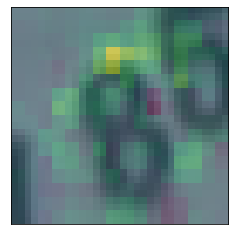

In [11]:
try:
    solution.plot_3_3()
except:
    print("ERROR, could not build class activation plot. Please check original report")
if hasattr(solution, 'plot_activation_map'):
    %psource solution.plot_activation_map
else:
    %psource solution.plot_3_3

#### Answer 4.1, Fast feature extraction (5p)
- Import the VGG16 model, pretrained on ImageNet
- Freeze convolutional base, adds a dense layer
- Consider unfreezing the last few convolutional layers and evaluate whether that works better
    - Check if they do. It is very likely to help.
- Discuss the observed performance
    - Should get around 80% accuracy

Leaving the last 4 layers unfrozen ended up performing better than freezing all layers in the convolutional base. This way, the model can attain an accuracy of around 0.8; after this, it starts to overfit. This tendency to overfit quickly could partially be because the color information is not relevant to the number classification.  (length: 335)



Max val score: 81.83%


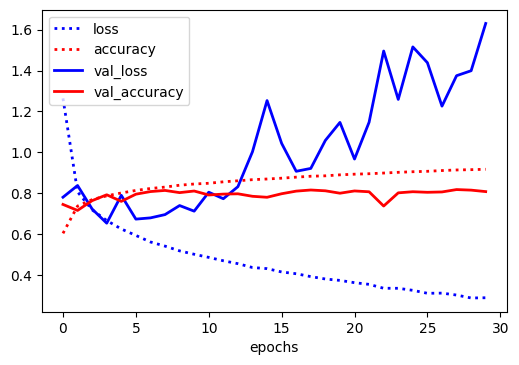

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_5 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                5130      
Total params: 14,719,818
Trainable params: 7,084,554
Non-trainable params: 7,635,264
_________________________________________________________________
None


def build_model_4_1():
    for layer in vgg_16.layers[:-4]:
        layer.trainable = False # Freeze layers
    model = models.Sequential()
    model.add(vgg_16)
    model.add(layers.Flatten())
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model



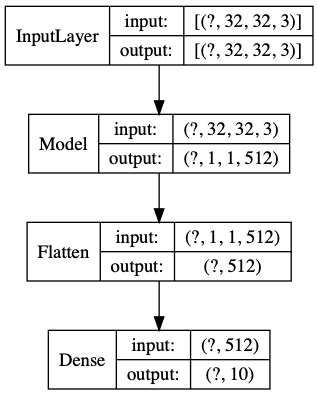

In [12]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

print_answer(solution.answer_q_4_1)
run_evaluation("model_4_1", solution.build_model_4_1, solution.evaluation_split, solution.base_dir, 
               solution.target_dir, train=False)
%psource solution.build_model_4_1
if os.path.exists(os.path.join(solution.target_dir,'model_4_1.png')):
    display(Image(os.path.join(solution.target_dir,'model_4_1.png'), width=200))
#solution.build_model_4_1().layers[0].summary()

#### Answer 4.2, Embeddings (5p)
- Generate embeddings with the trained convolutional part of model_4_1 (without the dense layer)
- Embed the training and test data and store them to disk
- Build and evaluate a pipeline on the embedded data
    - Check if pipeline makes sense (e.g. use models that can handle many dimensions)
- Describe what you did and what you observed (max 800 chars).
    - Consider different models, preprocessing, tuning, etc.
    - Check performance (see original Submission.html) when in doubt. We did not run all the evaluations because it takes too long, and the output is ill-defined.

In [13]:
print_answer(solution.answer_q_4_2)
print(solution.generate_pipeline())
#print("Evaluation:",solution.evaluation_4_2(solution.X_train, solution.y_train, solution.X_test, solution.y_test))
%psource solution.store_embeddings
%psource solution.evaluation_4_2

The validation set was used to various classifiers and scaling methods. The `best' performing was a combination of a random forest classifier and a normalizer. However,this did not result in a decent score; the accuracy being ~0.17. On the test data, the accuracy is around 0.72; but this result cannot be reliably counted on, as the validation set accuracy is so much worse. Obviously, this result does not beat the results obtained thus far. (length: 444)

Pipeline(steps=[('scaler', Normalizer()),
                ('classifier', RandomForestClassifier(random_state=1))])
def store_embeddings():
    """ Stores all necessary embeddings to file
    """
  
    X_train_embed = np.zeros((len(X_train), 512))
    for img in range(len(X_train)):
        X_train_embed[img] = model.predict(np.expand_dims(X_train[img], 0))
    store_embedding(X_train_embed, "X_train")

    X_test_embed = np.zeros((len(X_test), 512))
    for img in range(len(X_test)):
        X_test_embed[img] = model.predict(np.expand

In [14]:
end_verify = time.time()
print("Running time: {:.2f} seconds".format(end_verify - start_verify))
print("Last modified: {}".format(solution.last_edit))
print("scikit-learn version: {0}".format(solution.sklearn_version))

with open(solution.grade_file, "a") as myfile:
    myfile.write(','.join(grades)+"\n")

Running time: 26.65 seconds
Last modified: May 26, 2020
scikit-learn version: 0.23.1
